--- 
Final project for the course in Computational Statistics | Summer 2021, M.Sc. Economics, Bonn University | [Jonathan Willnow](https://github.com/JonathanWillnow)


# Partitioning and Hierachical Clustering and their Validation <a class="tocSkip">   
    
    
---
      


Xu,D., Tian,Y. A comprehensive Survey of Clustering Algorithms, Ann. Data. Sci 2, 165-193 (2015)      Minhua Chen et al(2021): Deep Clustering with Measure Propagation


##### Downloading and viewing this notebook:

* To view this notebook, the best way is to download the notebook which is contained in the repository on [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow). Other viewing options like _MyBinder_ or _NBViewer_ may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow) on GitHub).




In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as tools
import scipy.stats as scipy
import sklearn
import random
import kneed

from IPython.display import HTML

ModuleNotFoundError: No module named 'kneed'

---
# Table of Contents
---

 1. [Introduction](#introduction)
 2. [The Tracking Underreported Financial Flows (TUFF) methodology](#section2)
 3. [Descriptive Statistics & Allocation of Chinese Development Finance](#section3)
   * 3.1 [The Distribution of Project Types](#section3.1)
   * 3.2 [Sectoral Distribution](#section3.2)  
   *  3.3 [Finance Form of Projects](#section3.3)  
   *  3.4 [Cross-country Distribution of Chinese Development Finance](#section3.4)  
   *  3.5 [Factors that determined Allocation of Chinese Development Finance](#section3.5)  
       *  3.5.1 [Extension - Descriptive Plots](#section3.5.1)  
       *  3.5.2 [Physical Project Inputs](#section3.5.2)  
       *  3.5.3 [Foreign Exchange Reserves](#section3.5.3)
   *  3.6 [Mixed Effect Models](#section3.6) 
 4. [Identification](#section4)
 5. [Empirical Strategy](#section5)
    *  5.1 [IV Strategy](#section5.1)
    *  5.2 [Checking Parallel Trends Assumption](#section5.2)
 6. [Does Chinese Development Finance Promote Growth?](#section6)
    *  6.1 [Main Results](#section5.1)
    *  6.2 [Extension - Visual Representation of Results](#section6.2)
    *  6.3 [ Extension - Checking Instrument Validity](#section6.3)
    *  6.4 [Timing of the Growth Effects](#section6.4)
    *  6.5 [How does Chinese Development Finance cause Growth?](#section6.5)
    *  6.6 [Robustness Checks](#section6.6)
 7. [Conclusion](#section7)
 8. [References and Literature](#section8)







# Introduction

Every day, large amounts of data are collected by many heterogenous individuals. To create information from this data, clustering is an essential part in the process to identify patterns or groups within the collected data, which poses special challenges: Unlike other methods in Data Science, clustering does not try to predict an output. We only observe the input variables, but not the output variable.

I will explore several methods for partitioning and hierachical clustering and their validation. 

My simulation study will explain in which setup clustering methods works the most efficient and what kind of problems each method is facing / solving.


# 1. Clustering

Given by Marina:
The description should also include theoretical properties of the method together
with the properties of the data most often encountered in empirical settings. The
simulation study should reflect these two components. You may collaborate (i.e.
discuss) with other students who are working within the same general method, for
example, lasso, but everyone has to hand in an individual project


Clustering is often referred to as unsupervised machine larning. 

-------
Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. In practice, clustering helps identify two qualities of data:
Meaningfulness
Usefulness
Meaningful clusters expand domain knowledge. For example, in the medical field, researchers applied clustering to gene expression experiments. The clustering results identified groups of patients who respond differently to medical treatments.
Useful clusters, on the other hand, serve as an intermediate step in a data pipeline. For example, businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.

You can perform clustering using many different approaches—so many, in fact, that there are entire categories of clustering algorithms. Each of these categories has its own unique strengths and weaknesses. This means that certain clustering algorithms will result in more natural cluster assignments depending on the input data.
Selecting an appropriate clustering algorithm for your dataset is often difficult due to the number of choices available. Some important factors that affect this decision include the characteristics of the clusters, the features of the dataset, the number of outliers, and the number of data objects.

You’ll explore how these factors help determine which approach is most appropriate by looking at three popular categories of clustering algorithms:

Partitional clustering
Hierarchical clustering
Density-based clustering
It’s worth reviewing these categories at a high level before jumping right into k-means. You’ll learn the strengths and weaknesses of each category to provide context for how k-means fits into the landscape of clustering algorithms
https://realpython.com/k-means-clustering-python/

----------




## Partitioning Clustering

Partitioning clustering are  methods used to classify data objects into multiple groups, with at minimum one element, based on their similarity. No object can be a member of more than one cluster. For this categorie of clustering algorihm, the scientist has to specify $k$ - the number of clusters.

I will focus on two algorithms that are both non-deterministic, k-means clustering and k-medreiods clustering. Non deterministic simply means that we could obtain different results when we run the same algorithm several times over the same dataset.

Partitional clustering methods have several strengths:

+ They work well when clusters have a spherical shape.
+ They’re scalable with respect to algorithm complexity.
They also have several weaknesses:

+ They’re not well suited for clusters with complex shapes and different sizes.
+ They break down when used with clusters of different densities.
https://realpython.com/k-means-clustering-python/

### K means

K-means clutering was introduced by J. MacQueen in 1967 when he was proposing algorithms that can "paritioning an N-dimensional population into k sets" (MacQueen 1967). According to MacQueen, this algorithm produces partitions that are reasonably efficient in their within-class variance, is easily implemented and not to computationally extensice, although this last point is not that important anymore 50 years after the paper.(MacQueen)

As explained in Section 4, as a algorithm that is performing partitioning clustering, the k-means algorithm clusters objects by trying to partition them in k groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

\begin{equation}
\sum_{i=0}^n \min_{\mu_j \e C}(||{x_i}-{\mu_j}||^2)
\end{equation}

This requires to specify the number of clusters.https://scikit-learn.org/stable/modules/clustering.html#

Given a specified inital set of k-means $m_1$,...$m_k$ the algorithm performs two repeating steps:

1. Assignment: All objects of the dataset get assigned to the cluster with the nearest mean by using the Euclidean disntace
2. Update step: Recalculate the means (centroids) for the clusters

These two steps are repeated until the assignemtn does not longer change or the difference between the old and the new means are smaller than a specified threshold. Then the algorithm has converged. Since it is possible that the algorithm converges to a local minimum, the computation is repeated several times with different initial sets of k-means $m_1$,...$m_k$




You can generate the data from the above GIF using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:

n_samples is the total number of samples to generate.
centers is the number of centers to generate.
cluster_std is the standard deviation.
make_blobs() returns a tuple of two values:

A two-dimensional NumPy array with the x- and y-values for each of the samples
A one-dimensional NumPy array containing the cluster labels for each sample

In [14]:
random.seed(10)

In [19]:
features, true_labels = sklearn.datasets.make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

In [20]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [111]:
df = pd.DataFrame(features, columns = ["x1", "x2"])
df["label"] = true_labels
df.head(5)

,x1,x2,label
0,9.770759,3.276210,1
1,-9.713497,11.274518,0
2,-6.913306,-9.347559,2
3,-10.861859,-10.750635,2
4,-8.500380,-4.543704,2


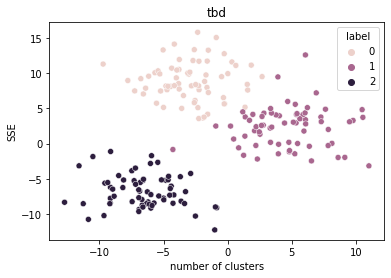

In [112]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x= df.x1, y=df.x2, hue=df.label)
ax.set_ylabel("SSE")
ax.set_xlabel("number of clusters")
ax.set_title("tbd");

In [45]:
true_labels[:5]


200

standartization

In [27]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(features)


In [30]:
kmeans = sklearn.cluster.KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42).fit(scaled_features)
#kmeans.fit(scaled_features)

In [33]:
#kmeans.inertia_
kmeans.labels_[:5]

array([0, 1, 2, 2, 2])

In [46]:
MSE = (true_labels == kmeans.labels_).sum() / len(true_labels)
MSE

0.34

Choosing the Appropriate Number of Clusters
In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:
https://realpython.com/k-means-clustering-python/
The elbow method
The silhouette coefficient
These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

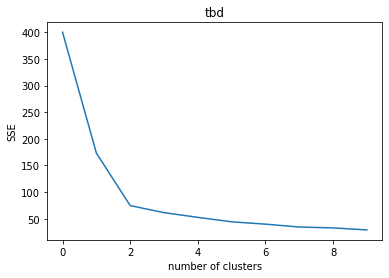

In [70]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}
sse = []
for k in range(1, 11):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

fig, ax = plt.subplots()
ax.plot(sse)
ax.set_ylabel("SSE")
ax.set_xlabel("number of clusters")
ax.set_title("tbd");

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:
https://realpython.com/k-means-clustering-python/

In [69]:
kl = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow


NameError: name 'kneed' is not defined

In [ ]:
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:

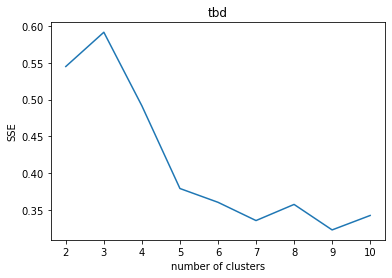

In [100]:
silhouette_coef = []
for k in range(2, 11):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = round(sklearn.metrics.silhouette_score(scaled_features, kmeans.labels_),4)
    silhouette_coef.append(score)

fig, ax = plt.subplots()
ax.plot(range(2,11), silhouette_coef)
ax.set_ylabel("SSE")
ax.set_xlabel("number of clusters")
ax.set_title("tbd");

C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

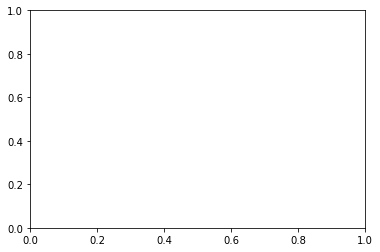

In [102]:
max_score = max(silhouette_coef)
max_score
best_k = 2+silhouette_coef.index(max_score)
best_k

3

https://realpython.com/k-means-clustering-python/

## Hierachial Clustering

## Validation

# Simulation Study

# Empirical Application

### Literature

(MacQueen 1967)(https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings%20of%20the%20Fifth%20Berkeley%20Symposium%20on%20Mathematical%20Statistics%20and%20Probability,%20Volume%201:%20Statistics/chapter/Some%20methods%20for%20classification%20and%20analysis%20of%20multivariate%20observations/bsmsp/1200512992)
